In [51]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
scenario = "testing"
sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.size': 13})
plt.rc('ytick', labelsize=13) 
plt.rc('xtick', labelsize=13) 

In [52]:
path_to_results1 = os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ) , "amiris_workflow" , "amiris_data_structure.xlsx")

In [53]:
scenarios = ["noSR", "SR"]

In [54]:
energy_exchange = {}
for i in scenarios:
    df_name = f'df_{i}'  # Create a unique name for each DataFrame \plots\Scenarios\NL-noSR
    path_to_results1 =os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ) ,"amiris_workflow" , "output",  i + ".xlsx")
    print(path_to_results1)
    data =  pd.read_excel(path_to_results1, sheet_name='energy_exchange', index_col=0)
    energy_exchange[df_name] = pd.DataFrame(data)

C:\toolbox-amiris-emlab\amiris_workflow\output\noSR.xlsx
C:\toolbox-amiris-emlab\amiris_workflow\output\SR.xlsx


In [63]:
hourly_generation = {}
for i in scenarios:
    df_name = f'df_{i}'  # Create a unique name for each DataFrame \plots\Scenarios\NL-noSR
    path_to_results1 =os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ) ,"amiris_workflow" , "output",  i + ".xlsx")
    data =  pd.read_excel(path_to_results1, sheet_name='hourly_generation', index_col=0)
    hourly_generation[df_name] = (data)

Text(0.5, 1.0, 'ElectricityPriceInEURperMWH')

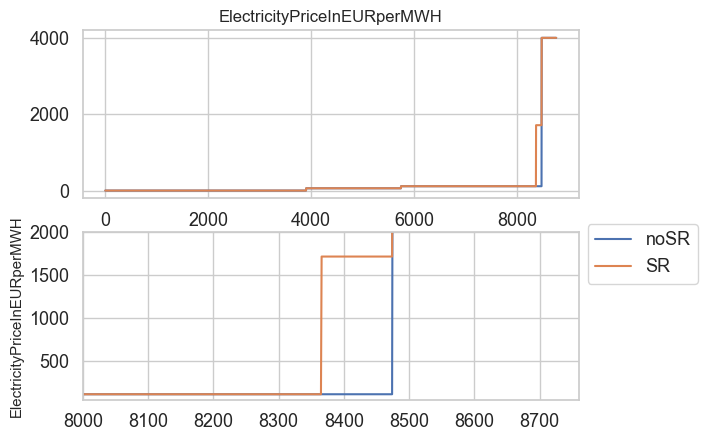

In [57]:
fig, axes= plt.subplots(nrows=2, ncols=1)
for df_name, df in energy_exchange.items():
    sorted_elec_prices = df["ElectricityPriceInEURperMWH"].copy()    
    sorted_elec_prices.sort_values(ignore_index=True, inplace=True)
    axs1 = sorted_elec_prices.plot(ax=axes[0])
    plt.xlim([8000, 8760])
    plt.ylim([50, 2000])
    axs2 = sorted_elec_prices.plot(ax=axes[1])
plt.legend(scenarios, fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
plt.ylabel('ElectricityPriceInEURperMWH', fontsize='small')
axes[0].set_title('ElectricityPriceInEURperMWH')

#fig.savefig(path_to_plots + '/' + 'elec_prices.png', bbox_inches='tight', dpi=300) 

Text(0.5, 1.0, 'DispatchSystemCostInEUR')

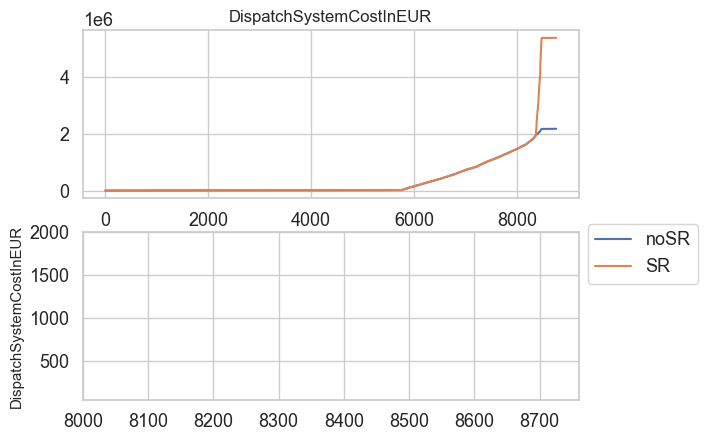

In [58]:
fig, axes= plt.subplots(nrows=2, ncols=1)
for df_name, df in energy_exchange.items():
    sorted_costs = df["DispatchSystemCostInEUR"].copy()    
    sorted_costs.sort_values(ignore_index=True, inplace=True)
    axs1 = sorted_costs.plot(ax=axes[0])
    plt.xlim([8000, 8760])
    plt.ylim([50, 2000])
    axs2 = sorted_costs.plot(ax=axes[1])
plt.legend(scenarios, fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
plt.ylabel('DispatchSystemCostInEUR', fontsize='small')
axes[0].set_title('DispatchSystemCostInEUR')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'hourly_generation')

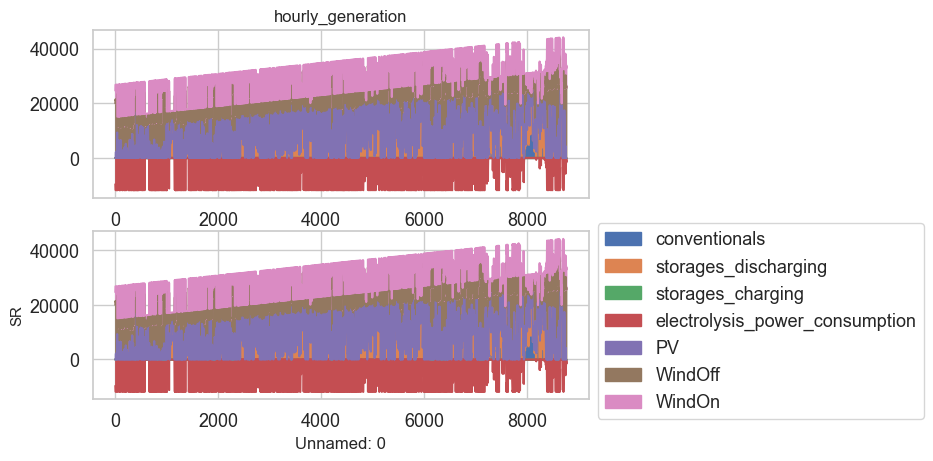

In [95]:
fig, axes= plt.subplots(nrows=2, ncols=1)
x = 0
for df_name, df in hourly_generation.items():
    withoutRES = df.drop(['res', 'unit_400000000', "load_shedding", "storages_aggregated_level", "electrolysis_hydrogen_generation"], axis=1)
    withoutRES["electrolysis_power_consumption"] = -withoutRES["electrolysis_power_consumption"]
    withoutRES["storages_charging"] = -withoutRES["storages_charging"]
    ax = withoutRES.plot.area(stacked=True, ax=axes[x], legend = False)
    x+= 1
    plt.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
plt.ylabel('SR', fontsize='small')
axes[0].set_title('hourly_generation')